<a href="https://colab.research.google.com/github/anmykhailenko/Hybrid-Rec-Sys/blob/main/_Anastasiia_Mykhailenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Introduction

1.1. Problem Statement

Problem and Objective
Campaigns use our advertising platform to acquire new customers. Campaigns have advertisements, they pay for clicks on those advertisements and aim to maximize conversions within limited daily budgets.
Also, campaigns compete for ad placements on widgets by adjusting their cpc (bid prices). If there is a high chance to get conversion on a certain place and for a certain user, we can increase the bid price for this campaign. User may click on this ad (and campaign will pay us for click) and may convert (campaign will get revenue from user’s purchase) after being redirected to a campaign’s site. So, in general we want to maximise number of conversions by increasing/decreasing cpc (cost of click, the sum which client pay for us) depending on user/placement quality, while campaigns’ total daily spent should be within its daily budget. Increase in cpc may increase chances of this ad to be shown, then to be clicked, and converted. So, in one hand increase in cpc increases number of clicks and conversions, but clients have limited budget on the other hand, therefore we want to maximise number of conversions within their budget.


# 1.2. Objective

deep dive into historical clicks data, and come up with ideas and do some checks  for data-driven decision-making algorithm to maximize the number of buyConversions within the daily budget of various CPA (Cost Per Action) campaigns


## 2. Data Loading and Exploration

# 2.1. Importing Libraries

In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2.2. Loading Data


In [537]:
df = pd.read_csv('dataset.csv')


# 2.3. Initial Data Inspection

In [538]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414454 entries, 0 to 1414453
Data columns (total 57 columns):
 #   Column                             Non-Null Count    Dtype 
---  ------                             --------------    ----- 
 0   Unnamed: 0                         1414454 non-null  int64 
 1   muidn                              1412670 non-null  object
 2   countryId                          1414454 non-null  int64 
 3   campaignCategoryId                 1414454 non-null  int64 
 4   cpa_target                         1414454 non-null  int64 
 5   domain                             1414454 non-null  object
 6   pub_site_tier                      1414454 non-null  int64 
 7   pub_site_category                  1414454 non-null  int64 
 8   widget_placement_count             1414454 non-null  int64 
 9   teaser_category                    1414454 non-null  int64 
 10  teaser_ad_type                     1414454 non-null  object
 11  teaserId                           14

In [539]:
df.describe()

,Unnamed: 0,countryId,campaignCategoryId,cpa_target,pub_site_tier,pub_site_category,widget_placement_count,teaser_category,teaserId,teaser_image_id,...,user_clicks_total_year,user_conversions_total_year,user_unique_categories_total_year,user_clicks_sf_year,user_conversions_sf_year,user_unique_categories_sf_year,user_clicks_category_year,user_conversions_category_year,buyConversions,user_is_refreshed_widget
count,1.414454e+06,1414454.0,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,...,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06,1.414454e+06
mean,1.121736e+06,4.0,1.776072e+02,1.101489e+01,2.954348e+00,1.278941e+02,1.270384e+01,1.715231e+02,2.151270e+07,1.886233e+07,...,-7.103433e+02,-7.138084e+02,-7.130444e+02,-7.993714e+02,-8.002722e+02,-8.002517e+02,-9.178606e+02,-9.180421e+02,3.197036e-01,2.072453e-01
std,6.480327e+05,0.0,5.454573e+01,2.932764e+01,4.765893e-01,1.125440e+01,6.175498e+00,5.151075e+01,7.336659e+05,4.633639e+06,...,4.574497e+02,4.517358e+02,4.529406e+02,4.012784e+02,3.994019e+02,3.994334e+02,2.734596e+02,2.728289e+02,5.075118e-01,4.053330e-01
min,0.000000e+00,4.0,1.000000e+02,0.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.000000e+02,1.532329e+07,0.000000e+00,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00
25%,5.607348e+05,4.0,1.540000e+02,0.000000e+00,3.000000e+00,1.230000e+02,1.500000e+01,1.540000e+02,2.144361e+07,1.773603e+07,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00
50%,1.121522e+06,4.0,1.540000e+02,0.000000e+00,3.000000e+00,1.230000e+02,1.500000e+01,1.540000e+02,2.173209e+07,2.010285e+07,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00
75%,1.683058e+06,4.0,2.610000e+02,0.000000e+00,3.000000e+00,1.400000e+02,1.500000e+01,1.540000e+02,2.189348e+07,2.160948e+07,...,1.000000e+00,0.000000e+00,1.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.000000e+00,0.000000e+00
max,2.244871e+06,4.0,2.610000e+02,1.800000e+02,6.000000e+00,1.570000e+02,5.000000e+01,2.700000e+02,2.213552e+07,2.212818e+07,...,1.364000e+03,8.660000e+02,4.100000e+01,9.300000e+02,8.660000e+02,3.000000e+01,3.980000e+02,1.290000e+02,4.300000e+01,1.000000e+00


## 3. Data Preprocessing


### 3.1. Handling Missing Values

In [540]:
print(df.isnull().sum())

Unnamed: 0                                 0
muidn                                   1784
countryId                                  0
campaignCategoryId                         0
cpa_target                                 0
domain                                     0
pub_site_tier                              0
pub_site_category                          0
widget_placement_count                     0
teaser_category                            0
teaser_ad_type                             0
teaserId                                   0
teaser_image_id                            0
teaser_has_animation                       0
teaser_img_group_id                        0
teaser_title_language                      0
teaser_parent_category                     0
time                                       0
teaserCampaign                             0
user_session_page                          0
user_session_number_weekly                 0
user_session_number_monthly                0
user_campa

###3.2. Convert time column to readable format

In [541]:

df['time'] = pd.to_datetime(df['time'], unit='s')


In [542]:
print(df['time'].min())
print(df['time'].max())


2025-01-05 08:00:01
2025-01-27 07:59:55


## 4. Exploratory Data Analysis


### 4.1. Handling of missing values

proxy_type: 1,391,405 missing (98.3%) → Likely useless, consider dropping.
packageName: 942,763 missing (66.6%) → High missing rate, might be worth dropping.
trafficSource: 51,891 missing (3.6%) → Might be imputed or set to "Unknown".
muidn: 1,784 missing (0.1%) → Small percentage, can impute

In [543]:
df.drop(columns=['proxy_type', 'packageName'], inplace=True)


In [544]:
columns_to_check = [
    "user_clicks_total_year", "user_conversions_total_year", "user_unique_categories_total_year",
    "user_clicks_sf_year", "user_conversions_sf_year", "user_unique_categories_sf_year",
    "user_clicks_category_year", "user_conversions_category_year"
]

# replace placeholder values (-999) with NaN for proper handling
df[columns_to_check] = df[columns_to_check].replace(-999, pd.NA)

# Remove rows where these columns contain negative values
for col in columns_to_check:
    df = df[df[col] >= 0]

In [545]:
display(df.describe())

,Unnamed: 0,countryId,campaignCategoryId,cpa_target,pub_site_tier,pub_site_category,widget_placement_count,teaser_category,teaserId,teaser_image_id,...,userHour,browserId,regionId,user_geo_zone_id,isNewVisitor,internetConnection,widgetType,adver_client_id,buyConversions,user_is_refreshed_widget
count,1.132860e+05,113286.0,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,1.132860e+05,1.132860e+05,...,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000,113286.000000
mean,1.120718e+06,4.0,177.104682,10.407985,2.970058,129.931404,12.429162,168.991058,2.155398e+07,1.912077e+07,...,13.818301,30.346353,665.254074,252.487677,0.868598,1.921358,6.111364,700146.669641,0.362287,0.173596
min,4.000000e+00,4.0,100.000000,0.000000,1.000000,101.000000,1.000000,100.000000,1.532329e+07,0.000000e+00,...,0.000000,0.000000,115.000000,4.000000,0.000000,1.000000,0.000000,162165.000000,0.000000,0.000000
25%,5.566885e+05,4.0,154.000000,0.000000,3.000000,123.000000,8.000000,154.000000,2.148024e+07,1.907292e+07,...,10.000000,36.000000,124.000000,206.000000,0.000000,1.000000,7.000000,700325.000000,0.000000,0.000000
50%,1.119107e+06,4.0,154.000000,0.000000,3.000000,123.000000,15.000000,154.000000,2.172349e+07,2.056440e+07,...,14.000000,36.000000,132.000000,213.000000,0.000000,1.000000,7.000000,742530.000000,0.000000,0.000000
75%,1.682316e+06,4.0,261.000000,0.000000,3.000000,145.000000,15.000000,154.000000,2.190423e+07,2.160948e+07,...,19.000000,36.000000,144.000000,317.000000,2.000000,1.000000,7.000000,761934.000000,1.000000,0.000000
max,2.244864e+06,4.0,261.000000,180.000000,6.000000,157.000000,50.000000,270.000000,2.213552e+07,2.212818e+07,...,23.000000,71.000000,9009.000000,318.000000,2.000000,7.000000,25.000000,896231.000000,24.000000,1.000000
std,6.485130e+05,0.0,51.761138,25.019217,0.483039,11.480711,6.822892,47.024023,7.181742e+05,4.326896e+06,...,5.756190,12.292231,2097.346625,56.231277,0.991334,1.855128,2.213444,136217.791635,0.543447,0.378763


### 4.2. Distribution of conversions

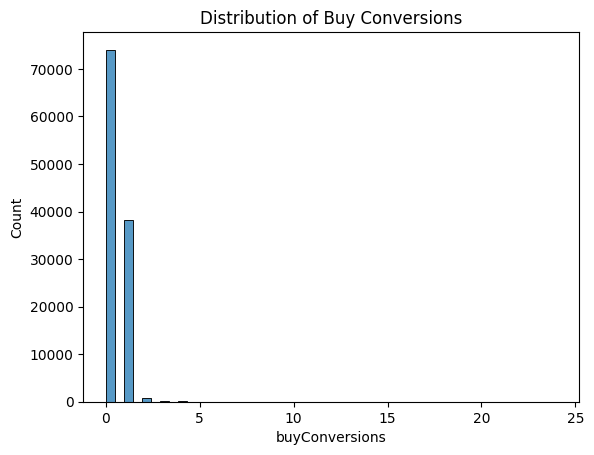

In [546]:
sns.histplot(df['buyConversions'], bins=50, kde=False)
plt.title('Distribution of Buy Conversions')
plt.show()

### 4.3. CPC and buyConversions relationship

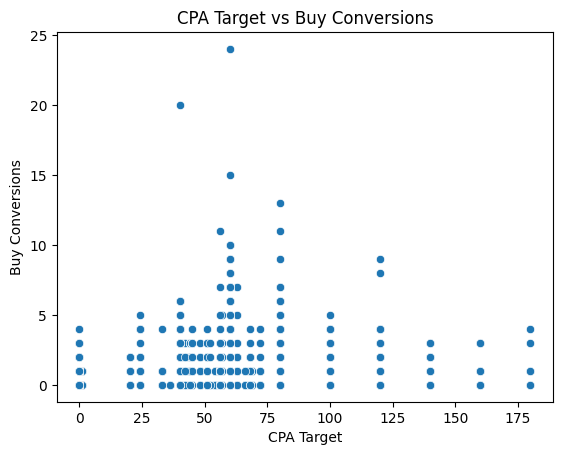

In [547]:

sns.scatterplot(x=df['cpa_target'], y=df['buyConversions'])
plt.title('CPA Target vs Buy Conversions')
plt.xlabel('CPA Target')
plt.ylabel('Buy Conversions')
plt.show()



### 4.4. Time-based conversion analysis

<ipython-input-548-fc45554a81be>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




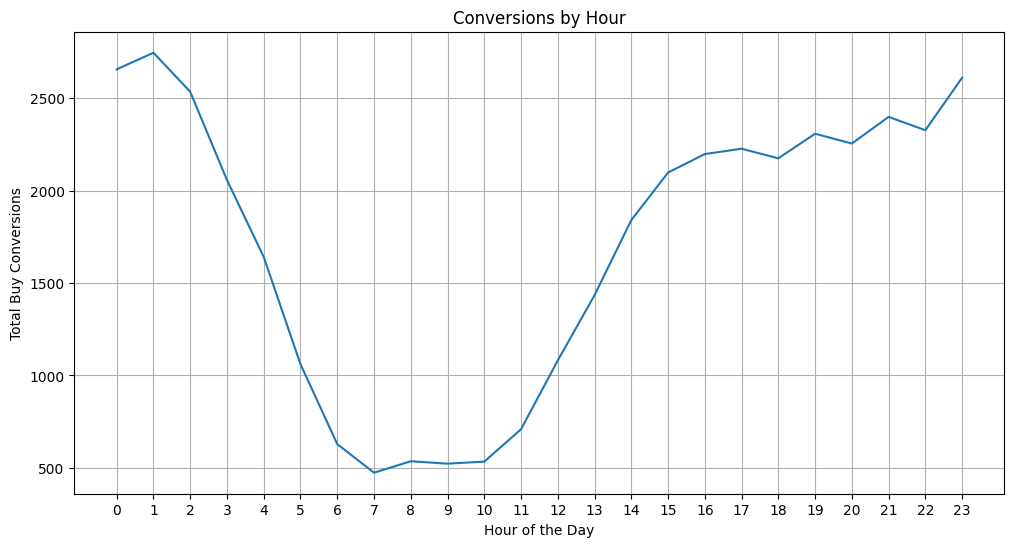

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

df['hour'] = df['time'].dt.hour  # Extract the hour again

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['hour'], y=df['buyConversions'], estimator='sum', ci=None)
plt.title('Conversions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Buy Conversions')
plt.xticks(range(24))
plt.grid(True)
plt.show()


So, hours with the highest convertion appear between 14:00 and 05:00

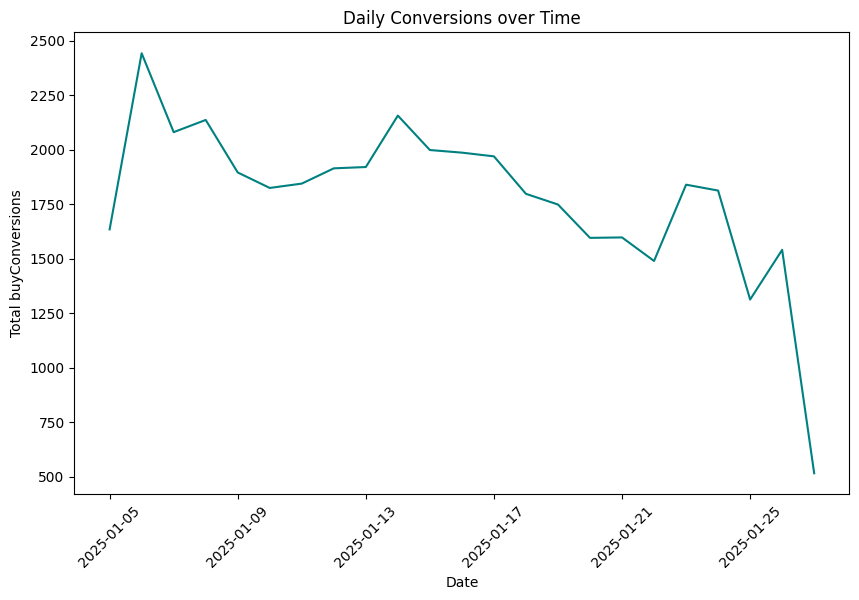

In [549]:
# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['time'])

# Group by day and calculate the sum of conversions
df['day'] = df['timestamp'].dt.date
daily_conversions = df.groupby('day')['buyConversions'].sum().reset_index()

# Plotting the time series (daily conversions)
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_conversions, x='day', y='buyConversions', color='teal')
plt.title('Daily Conversions over Time')
plt.xlabel('Date')
plt.ylabel('Total buyConversions')
plt.xticks(rotation=45)
plt.show()


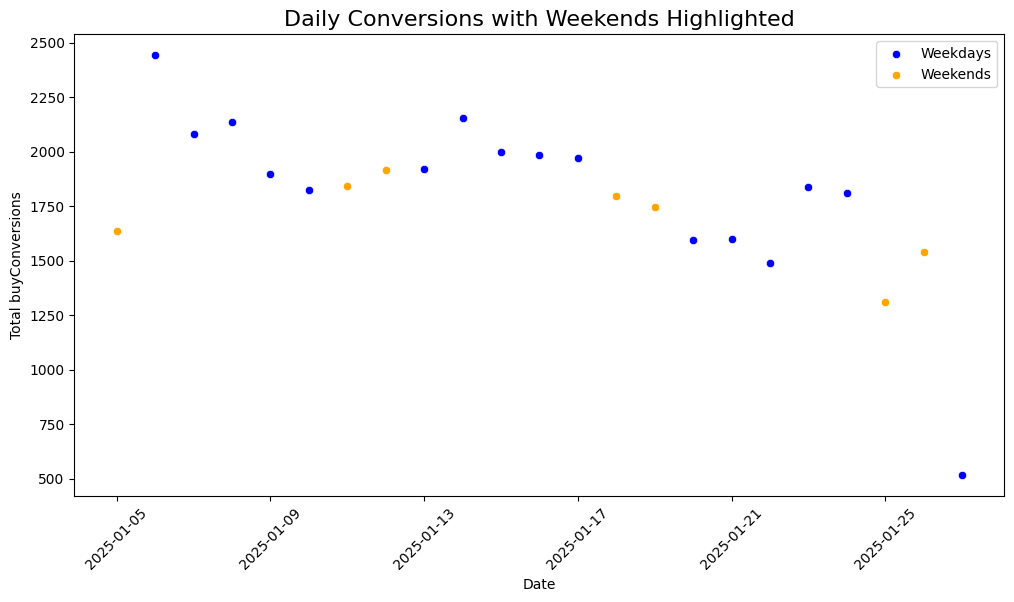

In [550]:

# Extract the day of the week from the timestamp (0 = Monday, 6 = Sunday)
df['weekday'] = df['timestamp'].dt.weekday

# Define a column that indicates if the day is a weekend (Saturday=5, Sunday=6)
df['is_weekend'] = df['weekday'].isin([5, 6])

# Group by day and sum the buyConversions
df['day'] = df['timestamp'].dt.date
daily_conversions = df.groupby('day')['buyConversions'].sum().reset_index()

# Add a column to mark weekends in the daily_conversions DataFrame
daily_conversions['is_weekend'] = daily_conversions['day'].apply(lambda x: pd.to_datetime(x).weekday() in [5, 6])

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for weekdays (color: light blue)
sns.scatterplot(data=daily_conversions[~daily_conversions['is_weekend']],
                x='day', y='buyConversions', color='blue', label='Weekdays')

# Scatter plot for weekends (color: orange)
sns.scatterplot(data=daily_conversions[daily_conversions['is_weekend']],
                x='day', y='buyConversions', color='orange', label='Weekends')

# Title and labels
plt.title('Daily Conversions with Weekends Highlighted', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total buyConversions')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()


#### So, no peaks on the weekends

### 4.5. Correlation analysis


Correlation Matrix:
                            user_session_number_weekly  user_campaign_shows  \
user_session_number_weekly                    1.000000             0.125867   
user_campaign_shows                           0.125867             1.000000   
buyConversions                               -0.055598            -0.026673   

                            buyConversions  
user_session_number_weekly       -0.055598  
user_campaign_shows              -0.026673  
buyConversions                    1.000000  


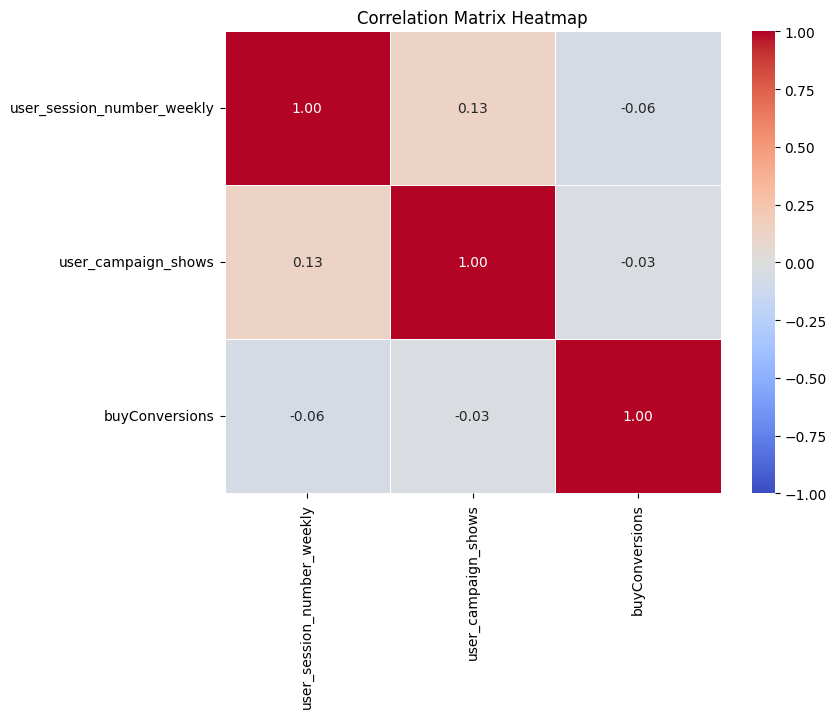

In [551]:
# Calculate correlations
correlation_matrix = df[['user_session_number_weekly', 'user_campaign_shows', 'buyConversions']].corr()


print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Extend correlation analysis


Correlation Matrix:
                             user_session_number_weekly  user_campaign_shows  \
user_session_number_weekly                     1.000000             0.125867   
user_campaign_shows                            0.125867             1.000000   
buyConversions                                -0.055598            -0.026673   
user_campaign_clicks                           0.068274             0.633393   
widget_placement_count                        -0.148471            -0.066758   
pub_site_tier                                 -0.079215            -0.008639   
teaser_has_animation                          -0.039238            -0.009834   
cpa_target                                     0.020263            -0.011712   
user_session_number_monthly                    0.886813             0.103697   
userHour                                      -0.010576             0.008163   

                             buyConversions  user_campaign_clicks  \
user_session_number_weekly   

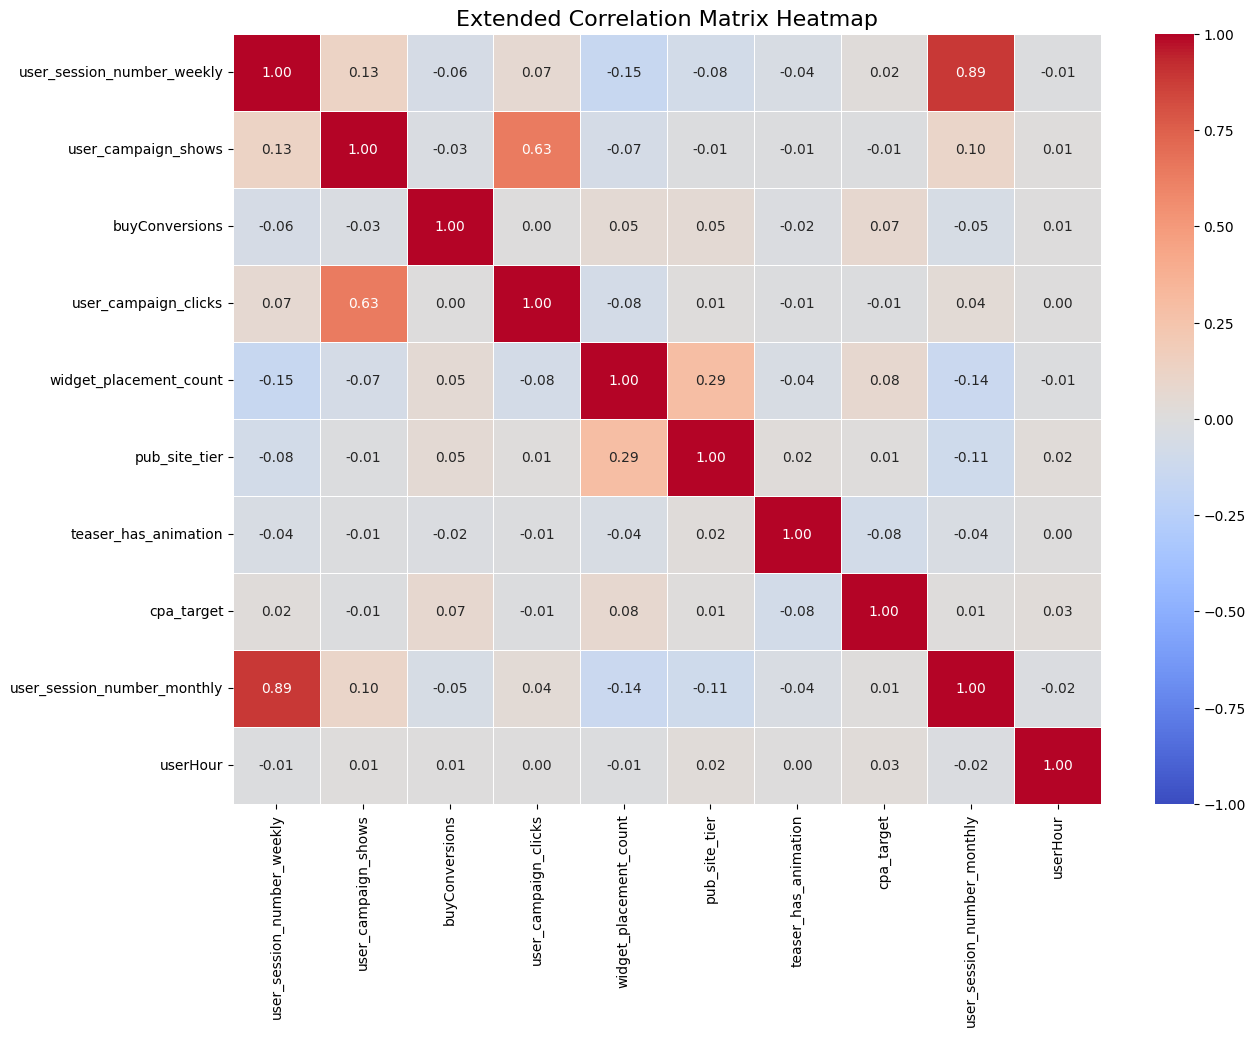

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns for correlation analysis
numeric_cols = [
    'user_session_number_weekly',
    'user_campaign_shows',
    'buyConversions',
    'user_campaign_clicks',

    'user_unique_categories_total_year',
    'user_clicks_sf_year',
    'widget_placement_count',
    'pub_site_tier',
    'teaser_has_animation',
    'cpa_target',
    'user_session_number_monthly',
    'user_clicks_total_year',
    'user_conversions_total_year',
    'user_unique_categories_total_year',
    'user_clicks_sf_year',
    'user_conversions_sf_year',
    'userHour'
]


correlation_matrix = df[numeric_cols].select_dtypes(include=['number']).corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Extended Correlation Matrix Heatmap', fontsize=16)
plt.show()


### Updated Conclusions Based on the Correlation Matrix:

- **Strong Positive Correlations:**
  1. **User Session Number Weekly and Monthly:** There is a very strong positive correlation (0.89), meaning that weekly and monthly user session counts are highly aligned.
  2. **User Clicks Total Year and User Clicks SF Year:** These two variables are strongly correlated (0.89), indicating that the number of clicks in the entire year is highly related to clicks specifically in the SF year.
  3. **User Conversions Total Year and User Conversions SF Year:** The correlation here is almost perfect (0.99), suggesting that conversions both annually and in the SF year are tightly linked.
  4. **User Unique Categories Total Year and User Clicks Total Year:** A strong positive relationship (0.68), indicating that users who engage more across unique categories are likely to click more in total during the year.
  5. **User Campaign Clicks and User Conversions Total Year:** These are positively correlated (0.33), suggesting that more campaign clicks are associated with higher conversions in the long term.

- **Negative Correlations:**
  1. **Widget Placement Count and User Session Number Weekly:** There is a weak negative correlation (-0.15), which suggests that more widget placements may be associated with fewer weekly sessions.
  2. **Teaser Has Animation and User Campaign Shows:** A weak negative correlation (-0.01), meaning that animations in teasers might slightly reduce the number of campaign shows.
  3. **Teaser Has Animation and Buy Conversions:** Another weak negative correlation (-0.02), suggesting that animations may slightly reduce conversions from campaigns.
  4. **User Hour and Multiple Other Variables:** There are weak to very weak negative correlations with user session counts and conversions, indicating that the time of day might have a small inverse effect on user behavior.

- **Moderate Correlations:**
  1. **User Clicks SF Year and User Conversions SF Year:** A moderate positive correlation (0.60), showing that users who click more tend to also convert more in the SF year.
  2. **User Clicks SF Year and User Unique Categories Total Year:** A moderate positive correlation (0.57), indicating that users who click more in SF year also tend to engage with more unique categories throughout the year.

- **Low Correlations:**
  1. **User Campaign Shows and Buy Conversions:** A very weak negative correlation (-0.03), suggesting little to no direct relationship between campaign shows and conversions.
  2. **CPA Target and Other Variables:** Weak to negligible correlations with other metrics, indicating that CPA target might not be strongly influencing other variables like clicks or conversions.

These insights suggest areas where user behavior is tightly linked (e.g., session count and conversions), while others, such as teaser animation and widget placement, have weaker or negative relationships with key engagement and conversion metrics.

### 4.6. Distribution analysis

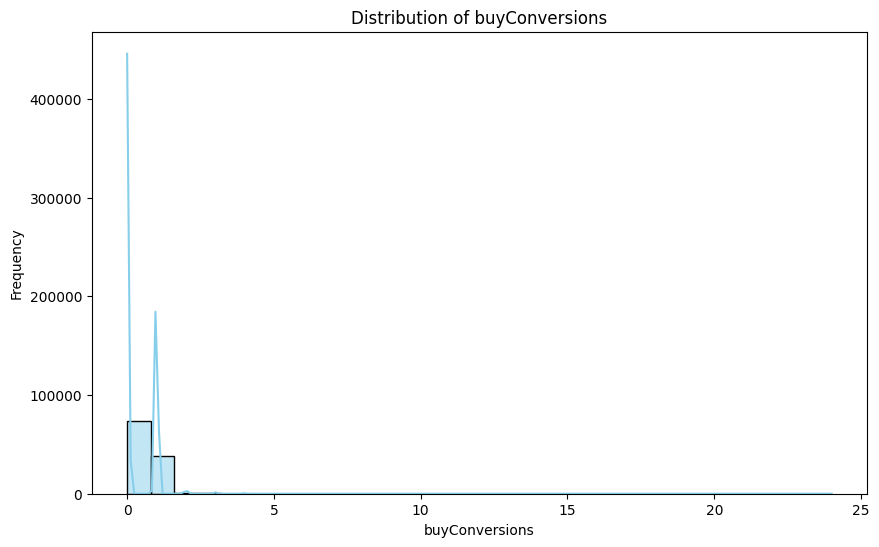

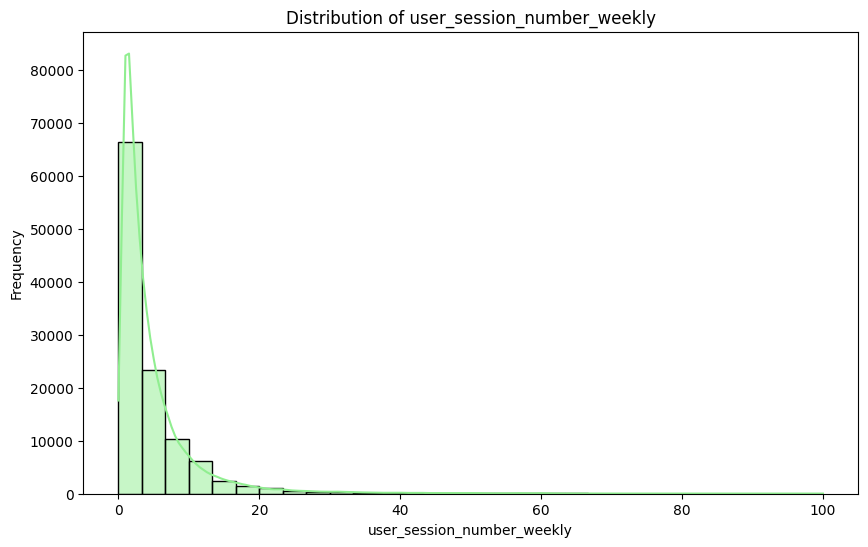

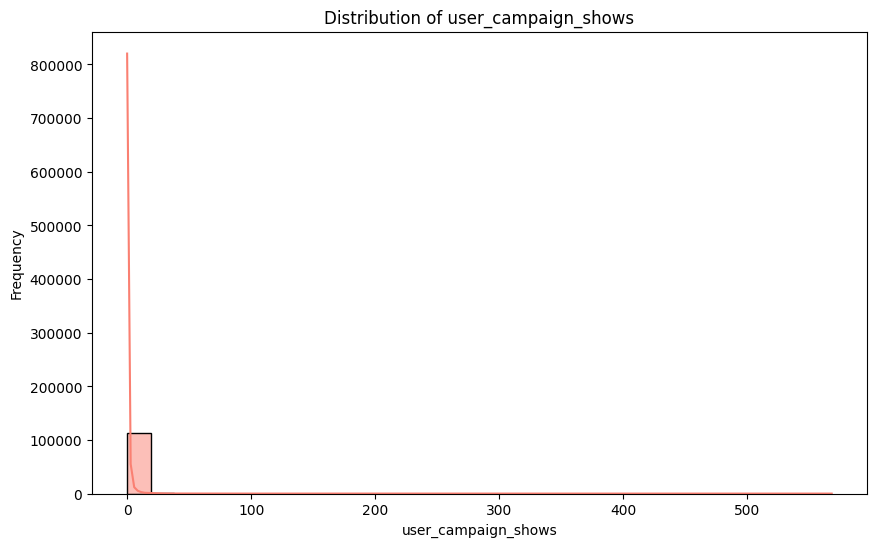

In [553]:

# Plot for buyConversions
plt.figure(figsize=(10, 6))
sns.histplot(df['buyConversions'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of buyConversions')
plt.xlabel('buyConversions')
plt.ylabel('Frequency')
plt.show()

# Plot for user_session_number_weekly
plt.figure(figsize=(10, 6))
sns.histplot(df['user_session_number_weekly'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of user_session_number_weekly')
plt.xlabel('user_session_number_weekly')
plt.ylabel('Frequency')
plt.show()

# Plot for user_campaign_shows
plt.figure(figsize=(10, 6))
sns.histplot(df['user_campaign_shows'], bins=30, kde=True, color='salmon')
plt.title('Distribution of user_campaign_shows')
plt.xlabel('user_campaign_shows')
plt.ylabel('Frequency')
plt.show()


### Box Plots

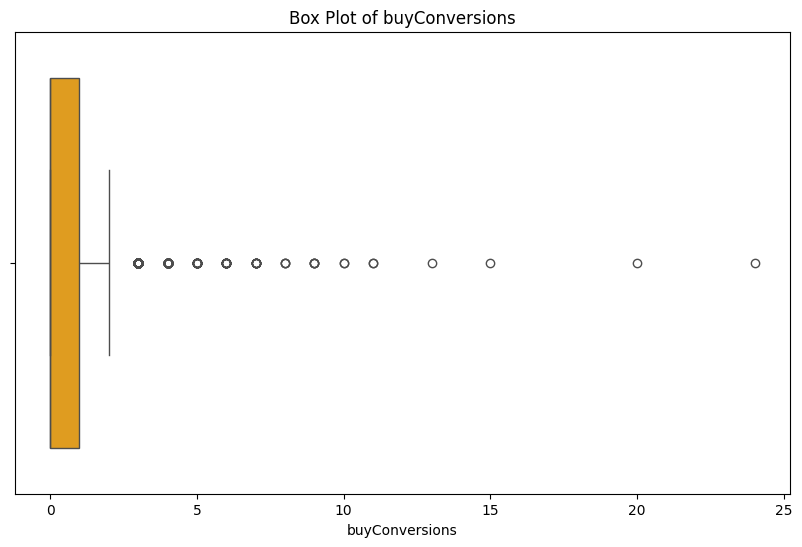

In [554]:
# Box plot for buyConversions to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['buyConversions'], color='orange')
plt.title('Box Plot of buyConversions')
plt.xlabel('buyConversions')
plt.show()


### 4.7. Break down conversions by device, trafficSource, widgetType, etc.
Understand how different devices and widgets perform.

<ipython-input-555-5668538960f4>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




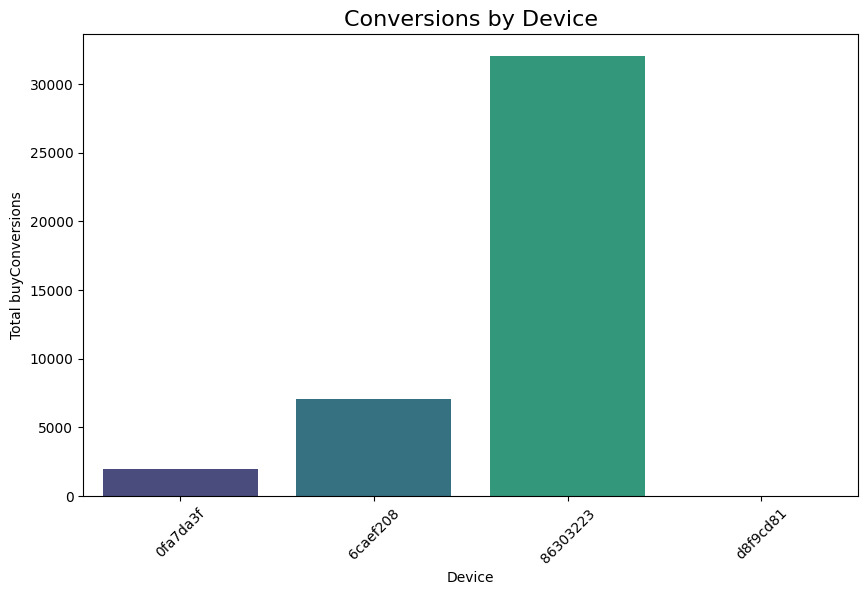

<ipython-input-555-5668538960f4>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




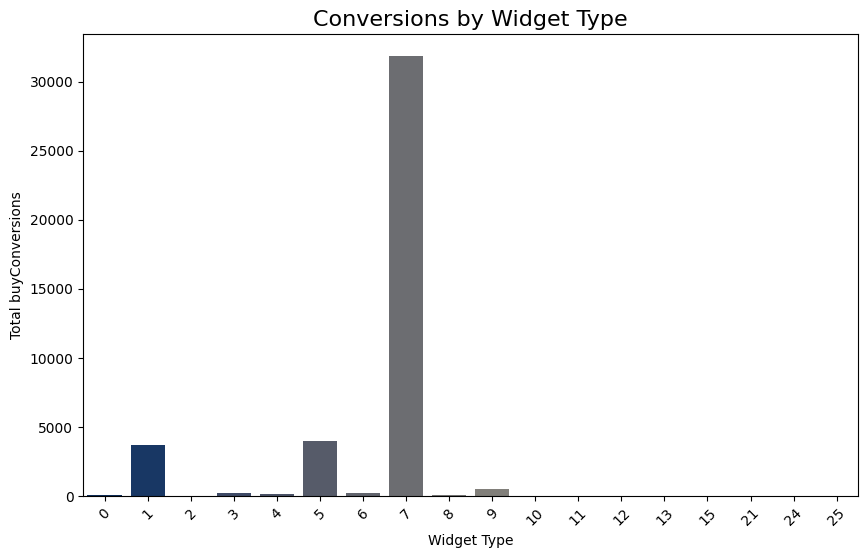

In [555]:


# Grouping by device type
device_conversions = df.groupby('device')['buyConversions'].sum().reset_index()

# Plotting conversions by device
plt.figure(figsize=(10, 6))
sns.barplot(data=device_conversions, x='device', y='buyConversions', palette='viridis')
plt.title('Conversions by Device', fontsize=16)
plt.xlabel('Device')
plt.ylabel('Total buyConversions')
plt.xticks(rotation=45)
plt.show()


# Grouping by widget type
widget_conversions = df.groupby('widgetType')['buyConversions'].sum().reset_index()

# Plotting conversions by widget type
plt.figure(figsize=(10, 6))
sns.barplot(data=widget_conversions, x='widgetType', y='buyConversions', palette='cividis')
plt.title('Conversions by Widget Type', fontsize=16)
plt.xlabel('Widget Type')
plt.ylabel('Total buyConversions')
plt.xticks(rotation=45)
plt.show()





In [556]:
# Grouping by traffic source to get total number of conversions per source
traffic_source_conversions = df.groupby('trafficSource')['buyConversions'].sum().reset_index()

# Sorting in descending order to prioritize traffic sources with the highest conversions
traffic_source_conversions = traffic_source_conversions.sort_values(by='buyConversions', ascending=False)

# Display the result
display(traffic_source_conversions)


,trafficSource,buyConversions
134,2ff8da70,16975
441,96cd5068,13324
98,25e3e87d,2574
712,f1f44c8c,2147
570,c3ac4239,802
...,...,...
446,99f34ac6,0
445,99e404e1,0
443,9899bcd4,0
126,2d91e6d4,0


####Highly Skewed Distribution – One traffic source (96cd5068) dominates with 108 conversions, significantly higher than others.

<ipython-input-557-15b7103646a7>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




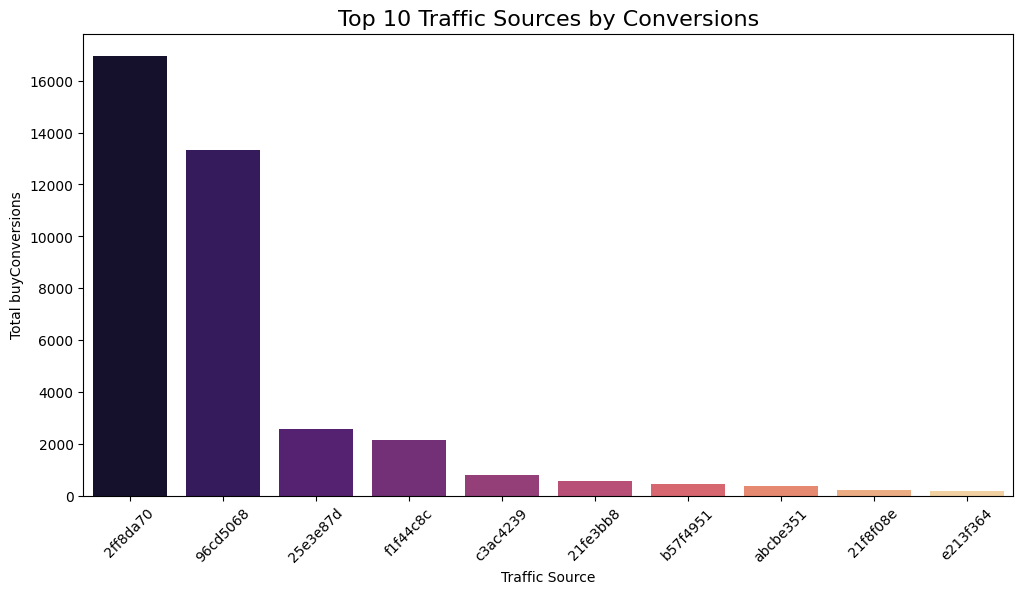

In [557]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summing conversions by traffic source
traffic_source_conversions = df.groupby('trafficSource')['buyConversions'].sum().reset_index()

# Sorting traffic sources by buyConversions
top_traffic_sources = traffic_source_conversions.sort_values(by='buyConversions', ascending=False).head(10)

# Plotting the top 20 traffic sources
plt.figure(figsize=(12, 6))
sns.barplot(data=top_traffic_sources, x='trafficSource', y='buyConversions', palette='magma')
plt.title('Top 10 Traffic Sources by Conversions', fontsize=16)
plt.xlabel('Traffic Source')
plt.ylabel('Total buyConversions')
plt.xticks(rotation=45)
plt.show()


##5. Feature Engineering

## 5.1. Creating new features

In [558]:


# Avoid division by zero by replacing 0 with NaN
df['CTR'] = df['user_campaign_clicks'] / df['user_campaign_shows']
df['CVR'] = df['buyConversions'] / df['user_campaign_clicks']

# replace NaNs with 0 (safer for modeling)
df['CTR'].fillna(0, inplace=True)
df['CVR'].fillna(0, inplace=True)

# Creating a user activity score
df['user_activity_score'] = df['user_session_number_weekly'] + df['user_clicks_category_year'] + df['user_conversions_category_year']


<ipython-input-558-f513eb30d683>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-558-f513eb30d683>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [559]:
df[['user_activity_score', 'CVR','CTR']].describe()


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



,CVR,CTR
count,113286.0,113286.000
mean,inf,inf
std,NaN,NaN
min,0.0,0.000
25%,0.0,0.000
50%,0.0,0.000
75%,NaN,0.125
max,inf,inf


###5.2. Features distribution

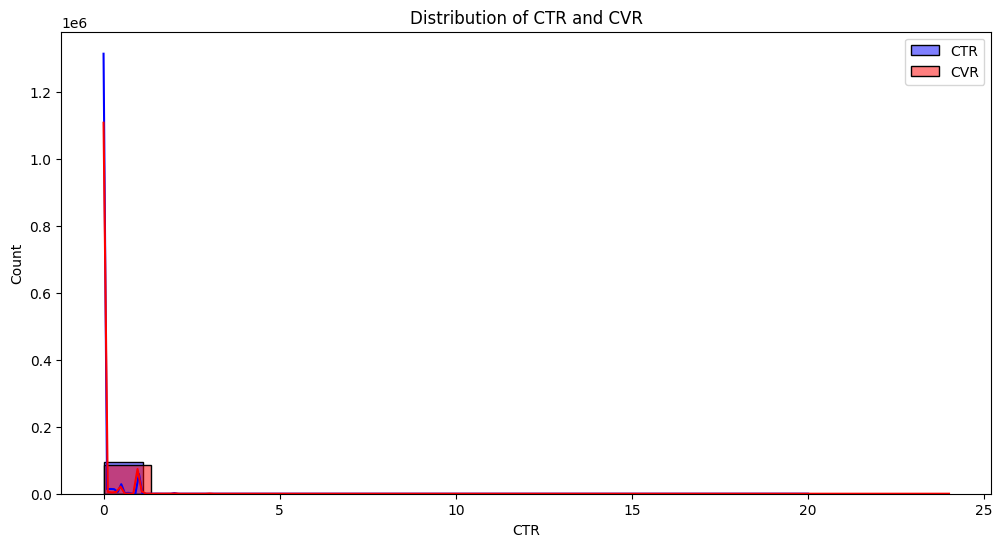

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of CTR and CVR
plt.figure(figsize=(12, 6))
sns.histplot(df['CTR'], kde=True, color='blue', label='CTR')
sns.histplot(df['CVR'], kde=True, color='red', label='CVR')
plt.legend()
plt.title('Distribution of CTR and CVR')
plt.show()


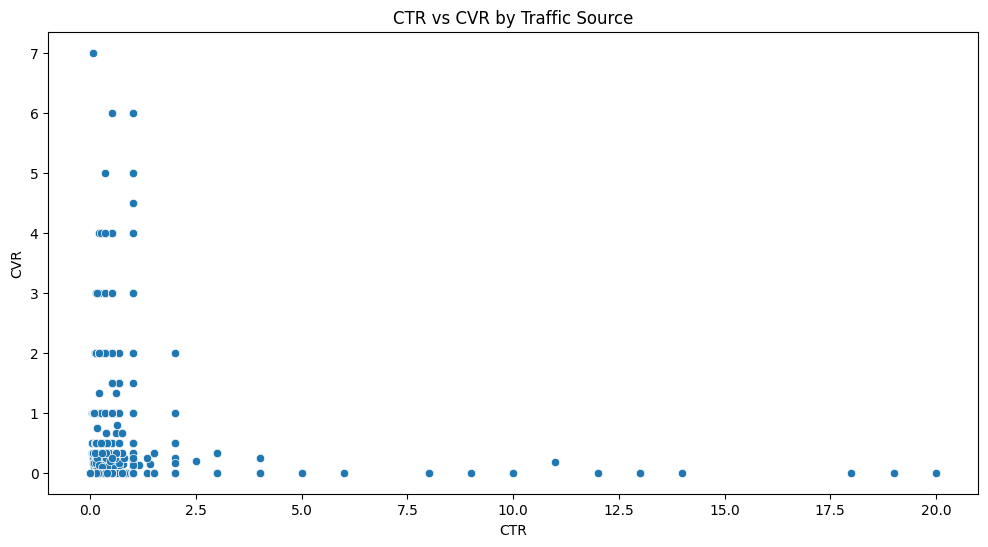

In [561]:
# Scatter plot of CTR vs CVR
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['CTR'], y=df['CVR'])
plt.xlabel('CTR')
plt.ylabel('CVR')
plt.title('CTR vs CVR by Traffic Source')
plt.show()


###5.3. Rolling Features


In [562]:
# Rolling average for user clicks
df['rolling_user_clicks'] = df['user_clicks_category_year'].rolling(window=7).mean()

#  Rolling sum for conversions
df['rolling_user_conversions'] = df['user_conversions_category_year'].rolling(window=7).sum()


 5.4. Lag Features

In [563]:
# Lagged feature for past weekly sessions
df['lagged_sessions'] = df['user_session_number_weekly'].shift(1)


## 5.5.Normalized features

In [564]:
# Normalizing the feature for user conversions
df['normalized_user_conversions'] = (df['user_conversions_category_year'] - df['user_conversions_category_year'].mean()) / df['user_conversions_category_year'].std()


In [565]:
df['avg_weekly_sessions'] = df['user_session_number_weekly'] / 7


# **Feature recommendation - create a feature engineering reusable and resharable piplene with applied logic**

##6. Feature Selection


### 6.1. Correlation Matrix with new features included

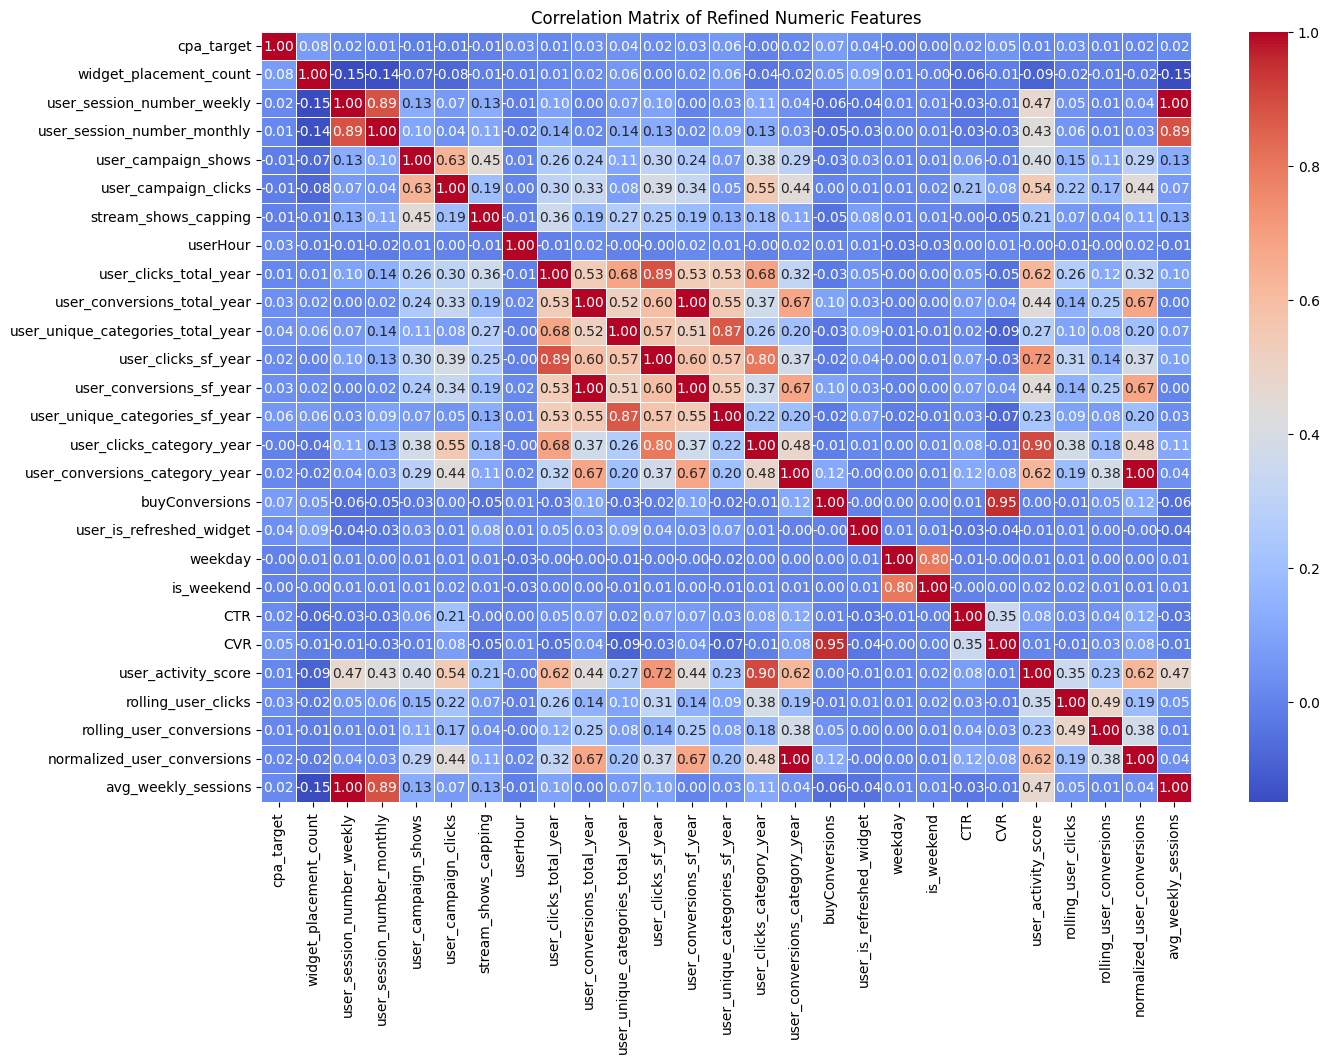

In [566]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of refined numeric columns for correlation analysis
numeric_columns = [
    'cpa_target', 'widget_placement_count', 'user_session_number_weekly', 'user_session_number_monthly',
    'user_campaign_shows', 'user_campaign_clicks', 'stream_shows_capping',
    'userHour', 'user_clicks_total_year', 'user_conversions_total_year', 'user_unique_categories_total_year',
    'user_clicks_sf_year', 'user_conversions_sf_year', 'user_unique_categories_sf_year',
    'user_clicks_category_year', 'user_conversions_category_year', 'buyConversions', 'user_is_refreshed_widget',
    'weekday', 'is_weekend', 'CTR', 'CVR', 'user_activity_score', 'rolling_user_clicks',
    'rolling_user_conversions', 'normalized_user_conversions', 'avg_weekly_sessions'
]

# Select the numeric columns from the DataFrame
numeric_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Refined Numeric Features')
plt.show()


###6.2. Identify features that have high corr with buy Conversions

In [567]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the correlation threshold
threshold = 0.15

# Select features that have absolute correlation greater than the threshold with 'buyConversions'
selected_features = corr_matrix[abs(corr_matrix['buyConversions']) > threshold].index.tolist()

# Remove 'buyConversions' from the list of selected features
selected_features.remove('buyConversions')

# Print the selected features
print("Selected features with correlation > 0.15 with buyConversions:")
print(selected_features)


Selected features with correlation > 0.15 with buyConversions:
['CVR']


###6.3. Find the pairs of features that are highly correlated

In [568]:

# Set the correlation threshold
threshold = 0.5

# Find the pairs of features that are highly correlated (greater than threshold)
highly_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_corr_pairs.add(colname)

# Print the features that are highly correlated
print(f"Highly correlated features (above threshold {threshold}):")
print(highly_corr_pairs)






Highly correlated features (above threshold 0.5):
{'user_conversions_category_year', 'CVR', 'user_session_number_monthly', 'user_unique_categories_sf_year', 'normalized_user_conversions', 'user_unique_categories_total_year', 'avg_weekly_sessions', 'user_conversions_sf_year', 'user_campaign_clicks', 'is_weekend', 'user_clicks_category_year', 'user_conversions_total_year', 'user_activity_score', 'user_clicks_sf_year'}


###6.4. Refined list of numerical features based on correlation analysis

In [569]:

selected_features_final = [
    'user_conversions_total_year', 'CVR', 'normalized_user_conversions',
    'avg_weekly_sessions', 'is_weekend', 'user_session_number_monthly'
]

# Select the final features from the DataFrame
X_final = numeric_df[selected_features_final]
y = numeric_df['buyConversions']



###6.5 Handling categorical features

In [570]:

from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_columns = [
    'countryId', 'campaignCategoryId', 'pub_site_category', 'teaser_category', 'teaser_parent_category',
    'user_session_page', 'client_site_id', 'compositeId', 'widgetCategory', 'osId', 'browserId', 'regionId',
    'user_geo_zone_id', 'internetConnection', 'widgetType', 'adver_client_id', 'isNewVisitor'
]




####Check the cardinality of categorical columns to define the right impute strategy

In [571]:


for col in categorical_columns:
  print(f"Column: {col}, Unique values: {df[col].nunique()}")


Column: countryId, Unique values: 1
Column: campaignCategoryId, Unique values: 4
Column: pub_site_category, Unique values: 32
Column: teaser_category, Unique values: 19
Column: teaser_parent_category, Unique values: 12
Column: user_session_page, Unique values: 161
Column: client_site_id, Unique values: 1021
Column: compositeId, Unique values: 2702
Column: widgetCategory, Unique values: 34
Column: osId, Unique values: 58
Column: browserId, Unique values: 13
Column: regionId, Unique values: 63
Column: user_geo_zone_id, Unique values: 18
Column: internetConnection, Unique values: 6
Column: widgetType, Unique values: 18
Column: adver_client_id, Unique values: 57
Column: isNewVisitor, Unique values: 2


In [572]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_columns = [
    'countryId', 'campaignCategoryId', 'pub_site_category', 'teaser_category', 'teaser_parent_category',
    'user_session_page', 'client_site_id', 'compositeId', 'widgetCategory', 'osId', 'browserId',
    'regionId', 'user_geo_zone_id', 'internetConnection', 'widgetType', 'adver_client_id', 'isNewVisitor'
]

# Dictionary for imputing strategies
imputation_strategies = {}

# Imputation logic based on unique values
for col in categorical_columns:
    unique_values = df[col].nunique()

    if unique_values == 1:  # No variability, no need for imputation
        imputation_strategies[col] = 'drop'
    elif unique_values <= 5:  # Low cardinality
        imputation_strategies[col] = 'most_frequent'
    elif unique_values <= 20:  # Moderate cardinality
        imputation_strategies[col] = 'most_frequent'
    else:  # High cardinality
        imputation_strategies[col] = 'most_frequent'

# Apply the imputation strategies to the DataFrame
for col, strategy in imputation_strategies.items():
    if strategy == 'drop':
        df.drop(columns=[col], inplace=True)
    elif strategy == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

#  print out the strategies applied to each column
for col, strategy in imputation_strategies.items():
    print(f"Column: {col}, Imputation Strategy: {strategy}")




Column: countryId, Imputation Strategy: drop
Column: campaignCategoryId, Imputation Strategy: most_frequent
Column: pub_site_category, Imputation Strategy: most_frequent
Column: teaser_category, Imputation Strategy: most_frequent
Column: teaser_parent_category, Imputation Strategy: most_frequent
Column: user_session_page, Imputation Strategy: most_frequent
Column: client_site_id, Imputation Strategy: most_frequent
Column: compositeId, Imputation Strategy: most_frequent
Column: widgetCategory, Imputation Strategy: most_frequent
Column: osId, Imputation Strategy: most_frequent
Column: browserId, Imputation Strategy: most_frequent
Column: regionId, Imputation Strategy: most_frequent
Column: user_geo_zone_id, Imputation Strategy: most_frequent
Column: internetConnection, Imputation Strategy: most_frequent
Column: widgetType, Imputation Strategy: most_frequent
Column: adver_client_id, Imputation Strategy: most_frequent
Column: isNewVisitor, Imputation Strategy: most_frequent


### 6.6 Encode selected featres

In [573]:
pip install category_encoders


In [577]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define target variable
target = 'buyConversions'

# Define feature lists
numerical_features = [
    'user_conversions_total_year', 'user_conversions_sf_year', 'user_conversions_category_year',
    'CVR', 'normalized_user_conversions'
]

low_cardinality_categorical_features = [
    'campaignCategoryId', 'pub_site_category', 'teaser_category', 'teaser_parent_category',
    'user_session_page', 'widgetCategory', 'osId', 'browserId', 'regionId',
    'user_geo_zone_id', 'internetConnection', 'widgetType'
]

high_cardinality_categorical_features = [
    'client_site_id', 'compositeId', 'adver_client_id'
]

# Handle Inf Values in Numerical Features
df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)

# Define imputers
num_imputer = SimpleImputer(strategy='median')  # Handles NaNs after replacing inf values
cat_imputer = SimpleImputer(strategy='most_frequent')

# Define encoders
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
target_encoder = TargetEncoder()

# Create transformers
num_transformer = Pipeline(steps=[
    ('imputer', num_imputer),
    ('scaler', scaler)
])

low_card_transformer = Pipeline(steps=[
    ('imputer', cat_imputer),
    ('onehot', one_hot_encoder)
])

high_card_transformer = Pipeline(steps=[
    ('imputer', cat_imputer),
    ('target_enc', target_encoder)
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('low_card', low_card_transformer, low_cardinality_categorical_features),
    ('high_card', high_card_transformer, high_cardinality_categorical_features)
])



<ipython-input-577-8af398a39493>:29: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



###6.6 Scale features

In [578]:
# Define X and y
X = df[numerical_features + low_cardinality_categorical_features + high_cardinality_categorical_features]
y = df[target]

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X, y)




In [579]:
# Get feature names after preprocessing
feature_names = numerical_features + \
                list(preprocessor.named_transformers_['low_card']['onehot'].get_feature_names_out(low_cardinality_categorical_features)) + \
                high_cardinality_categorical_features

# Convert processed data into DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=feature_names)

# Print the shape of the final dataset
print("Preprocessed Data Shape:", X_preprocessed_df.shape)

Preprocessed Data Shape: (113286, 446)


Next stepes for feature selection:


### 1. **Univariate Feature Selection**
   - This method involves selecting features based on their individual statistical relationship with the target variable (e.g., conversion). You can use:
     - **Chi-squared test** (for categorical data)
     - **ANOVA F-test** (for numerical data)
     - **Mutual Information** (for non-linear relationships)

### 2. **Model-based Feature Selection**
   - Use models to assess feature importance. Some algorithms, like **Random Forests** and **Gradient Boosting Machines (GBMs)**, provide built-in feature importance scores that can guide you in selecting the most impactful features.
     - **Random Forest**: Features that have high importance in a Random Forest model are likely to be significant for predictions.
     - **Lasso Regression**: It uses L1 regularization to penalize less important features, effectively performing feature selection by shrinking their coefficients to zero.

### 3. **Recursive Feature Elimination (RFE)**
   - RFE is a backward selection method that iteratively fits a model and removes the least important features based on model performance.
   - It’s a good method to choose the best set of features for models like linear regression or SVM.

### 4. **Cross-validation and Performance Evaluation**
   - Once you've selected a subset of features, you should evaluate the model’s performance with cross-validation to ensure that your feature selection didn’t cause overfitting or loss of predictive power.


###Ideas for an Algorithm to Maximize Conversions Within Budget Constraints


1. Budget-Aware Conversion Optimization Model  
   - Formulate an optimization problem using a combination of:  
     - Regression Model (XGBoost/LightGBM) to predict buyConversions.  
     - Classification Model(e.g., Logistic Regression) to predict the probability of a conversion.  
     - **Budget Constraints Modeling** using Linear Programming.  
   - Use **Multi-Armed Bandit (MAB)** or **Reinforcement Learning (RL)** to allocate budget efficiently among campaigns.  

2. Optimization Strategy
   - Expected Return on Ad Spend (ROAS): Prioritize users/segments with the highest conversion probability per cost.  
   -Dynamic Bidding Strategy: Adjust bids dynamically based on real-time data.  
   - Lookalike Audiences & Segmentation: Target high-converting users based on past behavior.  



### Performance Evaluation Metrics
1. Conversion Rate (CVR) Improvement  Measure if CVR improves after applying the algorithm.  
2. Budget Efficiency Ensure spending is optimized for maximum conversions.  
3. Lift Analysis Compare performance vs. a random allocation baseline.  
4. A/B Testing / Split traffic to compare new strategy vs. old.  
5. F1 Score (for Classification)




### Conclusions & Recommendations  


####  Potential Improvements & Next Steps:

A/B testing with a new budget allocation strategy  
Reinforcement Learning for continuous optimization.**  
 user clustering for more precise targeting.

